#### Importing Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from neuralprophet import NeuralProphet
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\samsa\Documents\Projects\Stock-Market-Prediction\venv\Lib\site-packages\lightning_fabric\__init__.py:29: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


#### Configuration

In [2]:
start_date = "2016-01-01"
end_date   = "2026-01-01"
forecast_days = 365
weekly_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

#### Stock 1 [AAPL]

##### Downloading Data

In [3]:
df_aapl_raw = yf.download(
    "AAPL", 
    start=start_date, 
    end=end_date, 
    auto_adjust=True, 
    progress=False
)

df_aapl_raw.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-04,23.753151,23.757661,22.997830,23.135367,270597600
2016-01-05,23.157911,23.865884,23.090272,23.843337,223164000
2016-01-06,22.704723,23.081258,22.517585,22.673158,273829600
2016-01-07,21.746479,22.576205,21.741970,22.249276,324377600
2016-01-08,21.861471,22.346230,21.816378,22.219968,283192000


##### Handling Multi-Index if Exists

In [4]:
if isinstance(df_aapl_raw.columns, pd.MultiIndex):
    df_aapl_raw.columns = df_aapl_raw.columns.droplevel('Ticker')

df_aapl_raw.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2016-01-04,23.753151,23.757661,22.997830,23.135367,270597600
2016-01-05,23.157911,23.865884,23.090272,23.843337,223164000
2016-01-06,22.704723,23.081258,22.517585,22.673158,273829600
2016-01-07,21.746479,22.576205,21.741970,22.249276,324377600
2016-01-08,21.861471,22.346230,21.816378,22.219968,283192000


In [5]:
df_aapl_raw.reset_index(inplace=True)
df_aapl_raw.head()

Price,Date,Close,High,Low,Open,Volume
0,2016-01-04,23.753151,23.757661,22.997830,23.135367,270597600
1,2016-01-05,23.157911,23.865884,23.090272,23.843337,223164000
2,2016-01-06,22.704723,23.081258,22.517585,22.673158,273829600
3,2016-01-07,21.746479,22.576205,21.741970,22.249276,324377600
4,2016-01-08,21.861471,22.346230,21.816378,22.219968,283192000


##### Preparing Data for NeuralProphet

In [6]:
df_aapl = df_aapl_raw[['Date','Close']].rename(columns={'Date':'ds','Close':'y'})
df_aapl['ds'] = pd.to_datetime(df_aapl['ds'])
df_aapl.dropna(inplace=True)

##### Fitting the Neural Prophet Model

In [7]:
model_aapl = NeuralProphet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    epochs=50
)

model_aapl.fit(df_aapl)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.221% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (40) is too small than the required number                     for the learning rate finder (235). The results might not be optimal.


Finding best initial lr:   0%|          | 0/235 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,330.579041,372.625336,1.095120,0.0,0
1,233.872589,276.781403,0.748585,0.0,1
2,144.237030,180.115082,0.421095,0.0,2
3,89.330696,112.908852,0.215013,0.0,3
4,53.609550,65.170631,0.095563,0.0,4
5,34.019829,39.157116,0.038242,0.0,5
6,25.971197,29.640598,0.022099,0.0,6
7,19.799362,22.694866,0.013331,0.0,7
8,15.962825,18.668255,0.009584,0.0,8
9,14.200165,16.967518,0.008230,0.0,9


##### Creating Future DataFrame

In [8]:
future_aapl = model_aapl.make_future_dataframe(df_aapl,periods=forecast_days, n_historic_predictions=True)
future_aapl

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.221% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y
0,2016-01-04,23.753151
1,2016-01-05,23.157911
2,2016-01-06,22.704723
3,2016-01-07,21.746479
4,2016-01-08,21.861471
...,...,...
2874,2027-05-20,NaN
2875,2027-05-21,NaN
2876,2027-05-24,NaN
2877,2027-05-25,NaN


##### Making Forecast

In [9]:
forecast_aapl = model_aapl.predict(future_aapl)
forecast_aapl

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.7% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.7% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.data.processing._handle_missing_data) - Dropped 365 rows at the end with NaNs in 'y' column.


Predicting: 40it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly,season_daily
0,2016-01-04,23.753151,15.037621,48.808640,4.345974,51.947441,-90.064438
1,2016-01-05,23.157911,14.257923,48.865685,4.103753,52.103401,-90.814919
2,2016-01-06,22.704723,15.733957,48.922729,3.867800,52.462189,-89.518761
3,2016-01-07,21.746479,14.205934,48.979774,3.639318,52.143238,-90.556396
4,2016-01-08,21.861471,13.682731,49.036819,3.420352,51.781002,-90.555443
...,...,...,...,...,...,...,...
2874,2027-05-20,NaN,286.456177,333.068176,-8.256392,51.880451,-90.236053
2875,2027-05-21,NaN,286.288971,333.155609,-8.296369,52.461178,-91.031471
2876,2027-05-24,NaN,287.227356,333.417938,-8.337042,51.613785,-89.467346
2877,2027-05-25,NaN,287.751068,333.505402,-8.322947,52.050404,-89.481773


##### Plotting Actual vs Forecasting

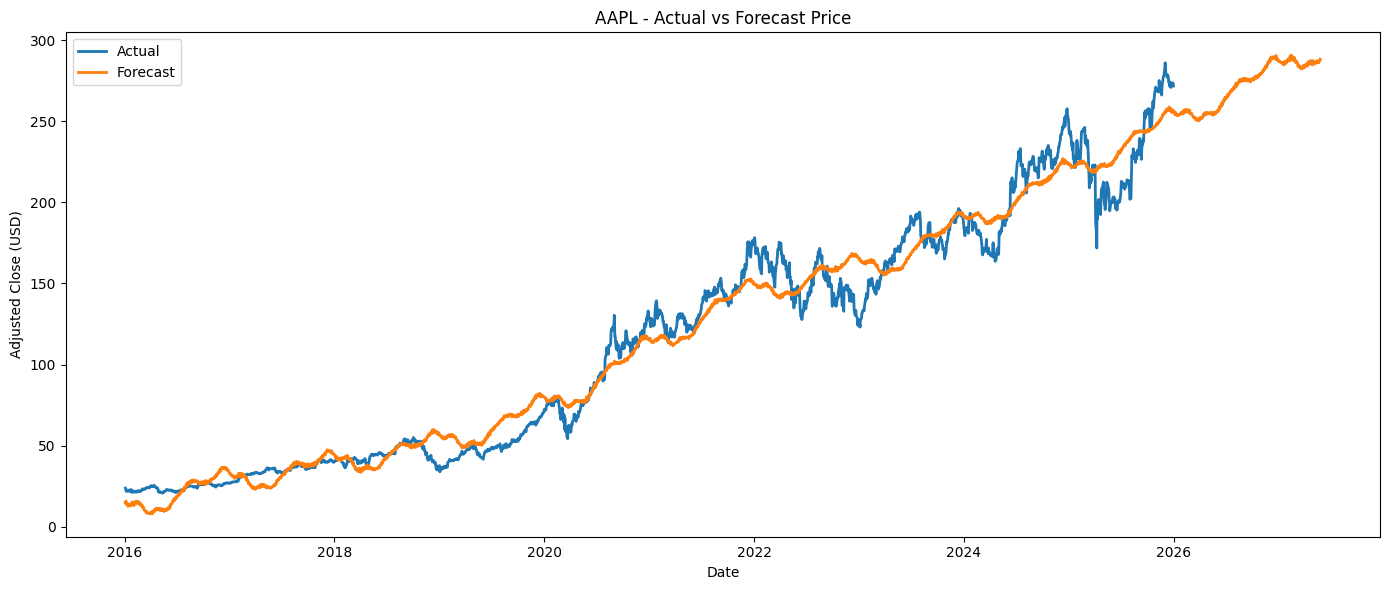

In [10]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_aapl, x="ds", y="y", label="Actual", linewidth=2)
sns.lineplot(data=forecast_aapl, x="ds", y="yhat1", label="Forecast", linewidth=2)

if {"yhat1_lower", "yhat1_upper"}.issubset(forecast_aapl.columns):
    plt.fill_between(
        forecast_aapl["ds"],
        forecast_aapl["yhat1_lower"],
        forecast_aapl["yhat1_upper"],
        alpha=0.25,
        label="Confidence Interval"
    )

plt.title("AAPL - Actual vs Forecast Price")
plt.xlabel("Date")
plt.ylabel("Adjusted Close (USD)")
plt.legend()
plt.tight_layout()
plt.show()

##### Plotting the Trend Component

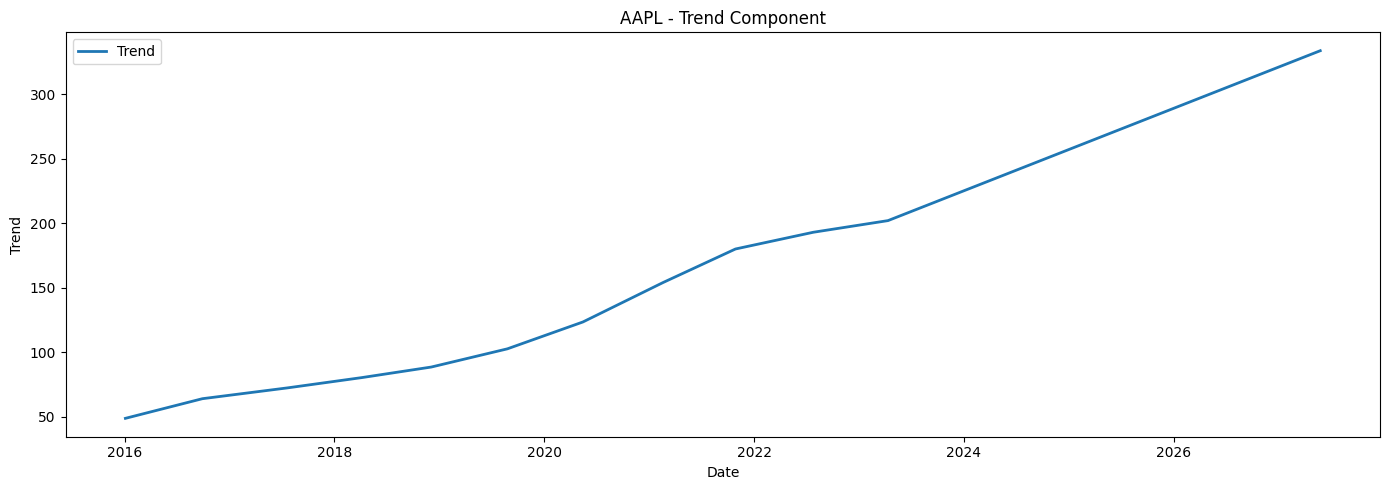

In [11]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=forecast_aapl, x="ds", y="trend", linewidth=2, label="Trend")
plt.title("AAPL - Trend Component")
plt.xlabel("Date")
plt.ylabel("Trend")
plt.legend()
plt.tight_layout()
plt.show()

##### Plotting Yearly Seasonality

AAPL yearly component columns: ['season_yearly']


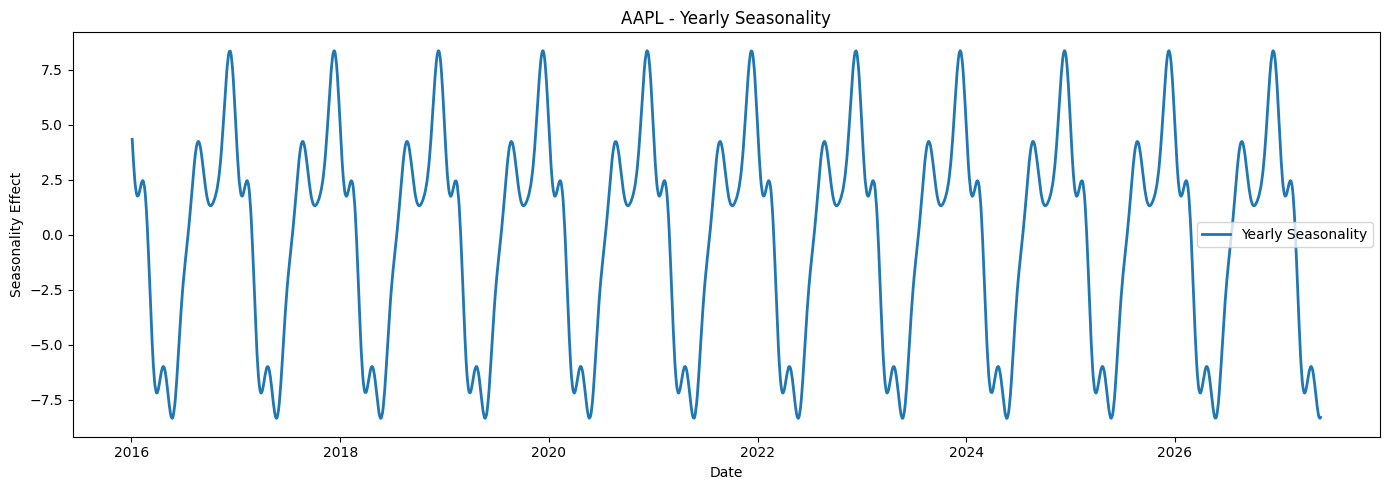

In [12]:
yearly_cols_aapl = [c for c in forecast_aapl.columns if "yearly" in c]
print("AAPL yearly component columns:", yearly_cols_aapl)

if yearly_cols_aapl:
    plt.figure(figsize=(14, 5))
    sns.lineplot(data=forecast_aapl, x="ds", y=yearly_cols_aapl[0], linewidth=2, label="Yearly Seasonality")
    plt.title("AAPL - Yearly Seasonality")
    plt.xlabel("Date")
    plt.ylabel("Seasonality Effect")
    plt.legend()
    plt.tight_layout()
    plt.show()

##### Plotting Monthly Component

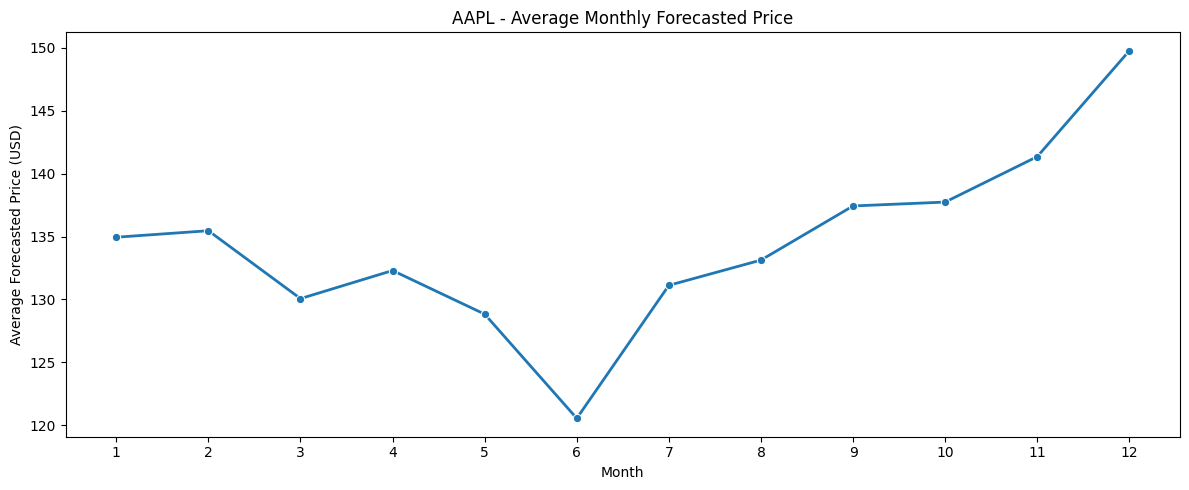

In [13]:
forecast_aapl["month"] = forecast_aapl["ds"].dt.month
monthly_aapl = forecast_aapl.groupby("month", as_index=False)["yhat1"].mean()

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_aapl, x="month", y="yhat1", marker="o", linewidth=2)
plt.title("AAPL - Average Monthly Forecasted Price")
plt.xlabel("Month")
plt.ylabel("Average Forecasted Price (USD)")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

##### Plotting Weekly Component

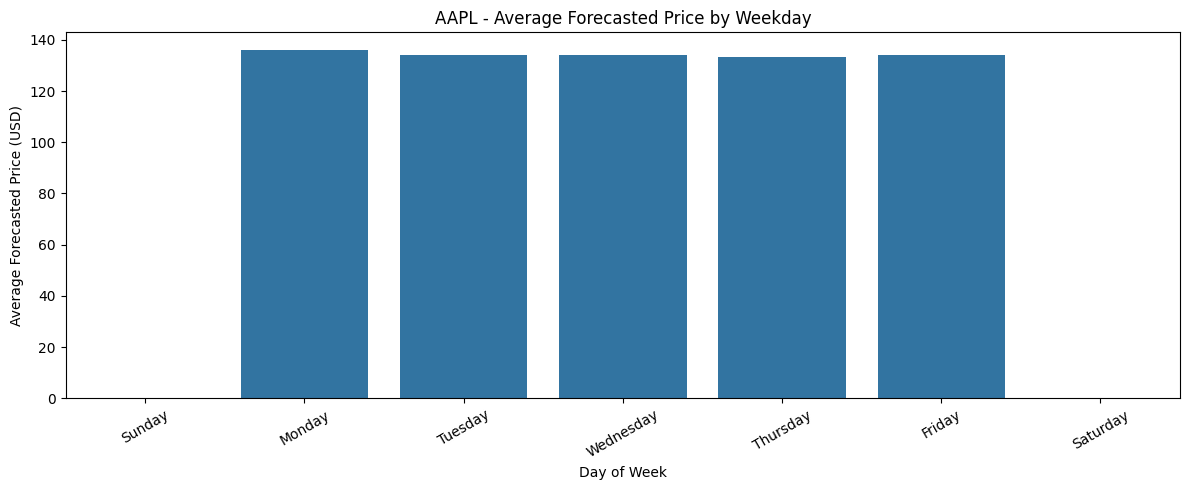

In [14]:
forecast_aapl["weekday"] = forecast_aapl["ds"].dt.day_name()
weekly_aapl = (
    forecast_aapl.groupby("weekday")["yhat1"].mean()
    .reindex(weekly_order)
    .reset_index()
)

plt.figure(figsize=(12, 5))
sns.barplot(data=weekly_aapl, x="weekday", y="yhat1")
plt.title("AAPL - Average Forecasted Price by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Average Forecasted Price (USD)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#### Stock 2 [GOOGL]

##### Downloading Data

In [15]:
df_googl_raw = yf.download(
    "GOOGL", 
    start=start_date, 
    end=end_date, 
    auto_adjust=True, 
    progress=False
)

df_googl_raw.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2016-01-04,37.687248,37.824214,37.096709,37.824214,67382000
2016-01-05,37.790966,38.171589,37.499172,37.918504,45216000
2016-01-06,37.681786,37.999386,37.119536,37.237147,48206000
2016-01-07,36.772163,37.482298,36.488309,37.044607,63132000
2016-01-08,36.271439,37.224734,36.172682,37.109603,47506000


##### Handling Multi-Index if Exists

In [16]:
if isinstance(df_googl_raw.columns, pd.MultiIndex):
    df_googl_raw.columns = df_googl_raw.columns.droplevel('Ticker')

df_googl_raw.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2016-01-04,37.687248,37.824214,37.096709,37.824214,67382000
2016-01-05,37.790966,38.171589,37.499172,37.918504,45216000
2016-01-06,37.681786,37.999386,37.119536,37.237147,48206000
2016-01-07,36.772163,37.482298,36.488309,37.044607,63132000
2016-01-08,36.271439,37.224734,36.172682,37.109603,47506000


In [17]:
df_googl_raw.reset_index(inplace=True)
df_googl_raw.head()

Price,Date,Close,High,Low,Open,Volume
0,2016-01-04,37.687248,37.824214,37.096709,37.824214,67382000
1,2016-01-05,37.790966,38.171589,37.499172,37.918504,45216000
2,2016-01-06,37.681786,37.999386,37.119536,37.237147,48206000
3,2016-01-07,36.772163,37.482298,36.488309,37.044607,63132000
4,2016-01-08,36.271439,37.224734,36.172682,37.109603,47506000


##### Preparing Data for NeuralProphet

In [18]:
df_googl = df_googl_raw[['Date','Close']].rename(columns={'Date':'ds','Close':'y'})
df_googl['ds'] = pd.to_datetime(df_googl['ds'])
df_googl.dropna(inplace=True)

##### Fitting the Neural Prophet Model

In [19]:
model_googl = NeuralProphet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    epochs=50
)

model_googl.fit(df_googl)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.221% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (40) is too small than the required number                     for the learning rate finder (235). The results might not be optimal.


Finding best initial lr:   0%|          | 0/235 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,221.732422,269.808044,0.961684,0.0,0
1,157.736237,192.406509,0.648182,0.0,1
2,112.266129,134.912170,0.425594,0.0,2
3,71.567459,87.204285,0.240421,0.0,3
4,31.115610,40.132320,0.073884,0.0,4
5,18.354160,26.268829,0.034143,0.0,5
6,15.599971,23.096468,0.027846,0.0,6
7,15.088954,21.893621,0.025855,0.0,7
8,14.592463,21.273006,0.024240,0.0,8
9,14.327250,20.771923,0.023210,0.0,9


##### Creating Future DataFrame

In [20]:
future_googl = model_googl.make_future_dataframe(df_googl,periods=forecast_days, n_historic_predictions=True)
future_googl

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.221% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y
0,2016-01-04,37.687248
1,2016-01-05,37.790966
2,2016-01-06,37.681786
3,2016-01-07,36.772163
4,2016-01-08,36.271439
...,...,...
2874,2027-05-20,NaN
2875,2027-05-21,NaN
2876,2027-05-24,NaN
2877,2027-05-25,NaN


##### Making Forecast

In [21]:
forecast_googl = model_googl.predict(future_googl)
forecast_googl

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.7% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.7% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.data.processing._handle_missing_data) - Dropped 365 rows at the end with NaNs in 'y' column.


Predicting: 40it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly,season_daily
0,2016-01-04,37.687248,35.807465,158.310104,2.025667,-20.282501,-104.245804
1,2016-01-05,37.790966,35.565598,158.336914,1.957155,-20.453999,-104.274467
2,2016-01-06,37.681786,35.568054,158.363724,1.898296,-20.316843,-104.377129
3,2016-01-07,36.772163,34.673340,158.390533,1.848868,-20.622149,-104.943916
4,2016-01-08,36.271439,35.383522,158.417343,1.808580,-20.204851,-104.637550
...,...,...,...,...,...,...,...
2874,2027-05-20,NaN,292.944366,420.932861,-2.948346,-20.603796,-104.436333
2875,2027-05-21,NaN,293.462646,421.060059,-2.861425,-20.302267,-104.433739
2876,2027-05-24,NaN,293.272461,421.441742,-2.605280,-20.337440,-105.226570
2877,2027-05-25,NaN,293.704498,421.568970,-2.522768,-20.437790,-104.903908


##### Plotting Actual vs Forecasting

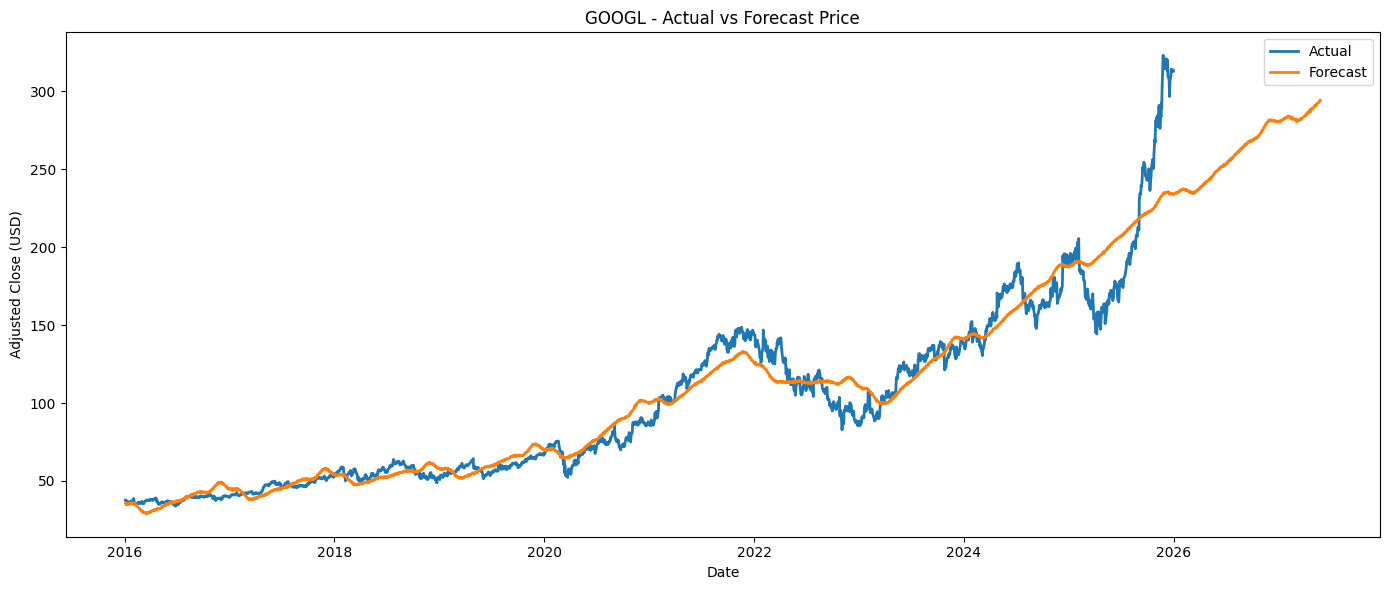

In [22]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_googl, x="ds", y="y", label="Actual", linewidth=2)
sns.lineplot(data=forecast_googl, x="ds", y="yhat1", label="Forecast", linewidth=2)

if {"yhat1_lower", "yhat1_upper"}.issubset(forecast_googl.columns):
    plt.fill_between(
        forecast_googl["ds"],
        forecast_googl["yhat1_lower"],
        forecast_googl["yhat1_upper"],
        alpha=0.25,
        label="Confidence Interval"
    )

plt.title("GOOGL - Actual vs Forecast Price")
plt.xlabel("Date")
plt.ylabel("Adjusted Close (USD)")
plt.legend()
plt.tight_layout()
plt.show()

##### Plotting the Trend Component

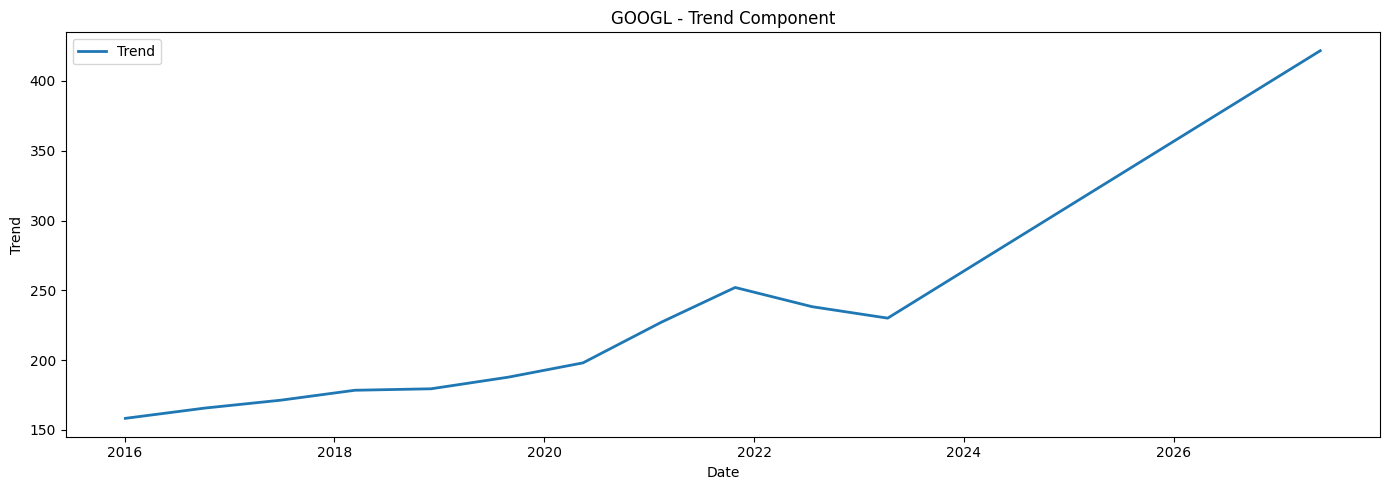

In [23]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=forecast_googl, x="ds", y="trend", linewidth=2, label="Trend")
plt.title("GOOGL - Trend Component")
plt.xlabel("Date")
plt.ylabel("Trend")
plt.legend()
plt.tight_layout()
plt.show()

##### Plotting Yearly Seasonality

GOOGL yearly component columns: ['season_yearly']


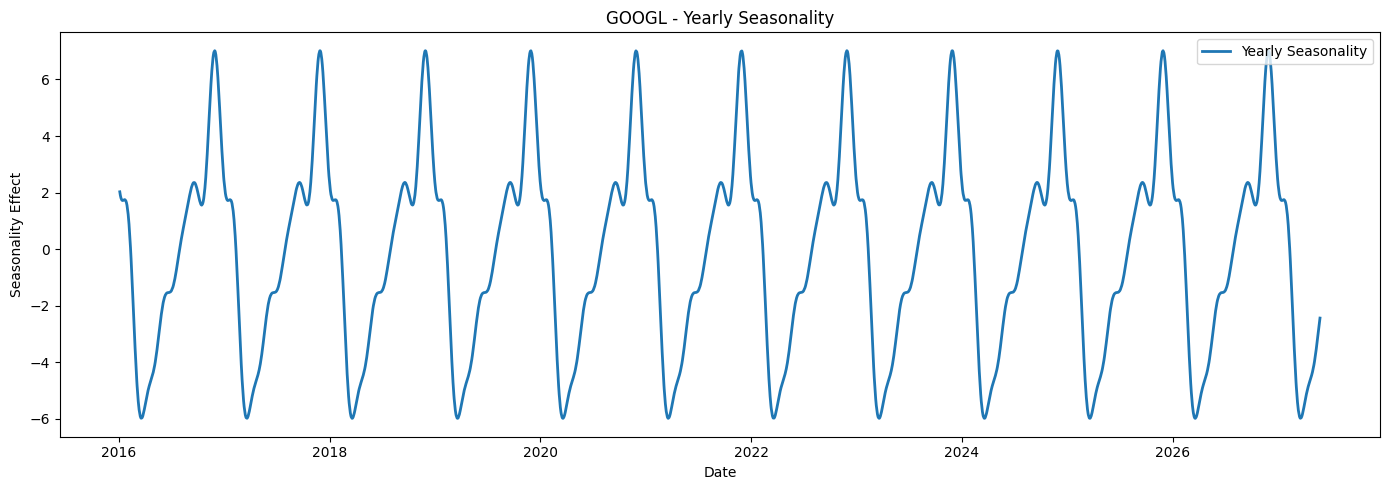

In [24]:
yearly_cols_googl = [c for c in forecast_googl.columns if "yearly" in c]
print("GOOGL yearly component columns:", yearly_cols_googl)

if yearly_cols_googl:
    plt.figure(figsize=(14, 5))
    sns.lineplot(data=forecast_googl, x="ds", y=yearly_cols_googl[0], linewidth=2, label="Yearly Seasonality")
    plt.title("GOOGL - Yearly Seasonality")
    plt.xlabel("Date")
    plt.ylabel("Seasonality Effect")
    plt.tight_layout()
    plt.show()

##### Plotting Monthly Component

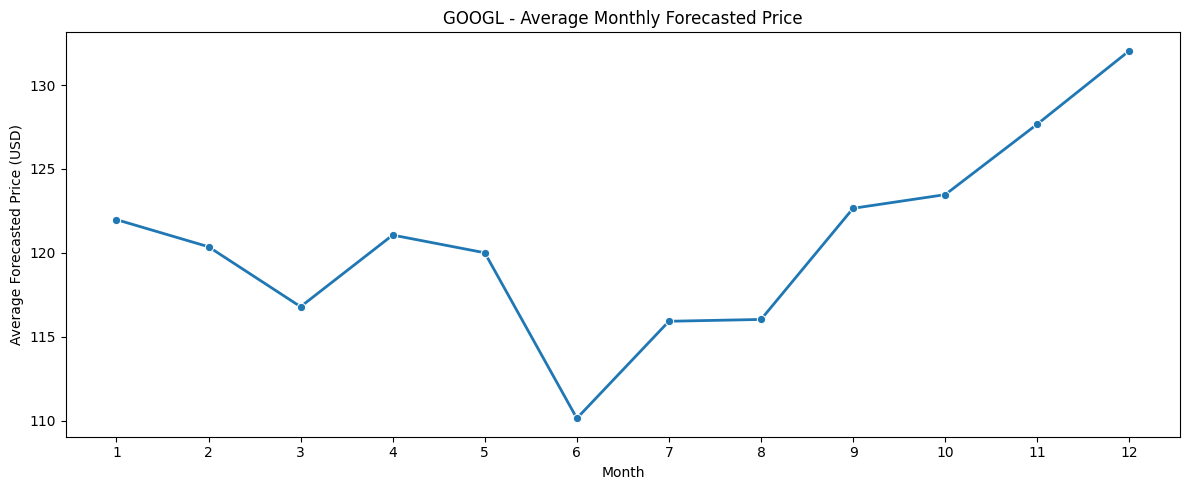

In [25]:
forecast_googl["month"] = forecast_googl["ds"].dt.month
monthly_googl = forecast_googl.groupby("month", as_index=False)["yhat1"].mean()

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_googl, x="month", y="yhat1", marker="o", linewidth=2)
plt.title("GOOGL - Average Monthly Forecasted Price")
plt.xlabel("Month")
plt.ylabel("Average Forecasted Price (USD)")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

##### Plotting Weekly Component

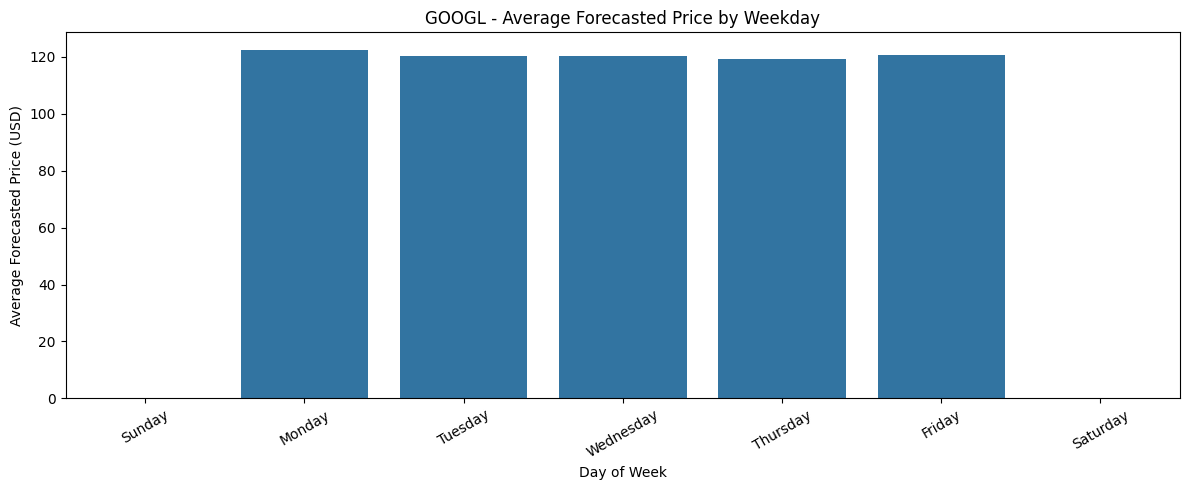

In [26]:
forecast_googl["weekday"] = forecast_googl["ds"].dt.day_name()
weekly_googl = (
    forecast_googl.groupby("weekday")["yhat1"].mean()
    .reindex(weekly_order)
    .reset_index()
)

plt.figure(figsize=(12, 5))
sns.barplot(data=weekly_googl, x="weekday", y="yhat1")
plt.title("GOOGL - Average Forecasted Price by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Average Forecasted Price (USD)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#### Stock 3 [MSFT]

##### Downloading Data

In [27]:
df_msft_raw = yf.download(
    "MSFT", 
    start=start_date, 
    end=end_date, 
    auto_adjust=True, 
    progress=False
)

df_msft_raw.head()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2016-01-04,47.983448,47.983448,46.748838,47.563155,53778000
2016-01-05,48.202354,48.500062,47.755795,48.097282,34079700
2016-01-06,47.326756,47.633221,46.967755,47.563171,39518900
2016-01-07,45.680607,46.836416,45.593047,46.144683,56564900
2016-01-08,45.820690,46.652517,45.663080,45.855712,48754000


##### Handling Multi-Index if Exists

In [28]:
if isinstance(df_msft_raw.columns, pd.MultiIndex):
    df_msft_raw.columns = df_msft_raw.columns.droplevel('Ticker')

df_msft_raw.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2016-01-04,47.983448,47.983448,46.748838,47.563155,53778000
2016-01-05,48.202354,48.500062,47.755795,48.097282,34079700
2016-01-06,47.326756,47.633221,46.967755,47.563171,39518900
2016-01-07,45.680607,46.836416,45.593047,46.144683,56564900
2016-01-08,45.820690,46.652517,45.663080,45.855712,48754000


In [29]:
df_msft_raw.reset_index(inplace=True)
df_msft_raw.head()

Price,Date,Close,High,Low,Open,Volume
0,2016-01-04,47.983448,47.983448,46.748838,47.563155,53778000
1,2016-01-05,48.202354,48.500062,47.755795,48.097282,34079700
2,2016-01-06,47.326756,47.633221,46.967755,47.563171,39518900
3,2016-01-07,45.680607,46.836416,45.593047,46.144683,56564900
4,2016-01-08,45.820690,46.652517,45.663080,45.855712,48754000


##### Preparing Data for NeuralProphet

In [30]:
df_msft = df_msft_raw[['Date','Close']].rename(columns={'Date':'ds','Close':'y'})
df_msft['ds'] = pd.to_datetime(df_msft['ds'])
df_msft.dropna(inplace=True)

##### Fitting the Neural Prophet Model

In [31]:
model_msft = NeuralProphet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    epochs=50
)

model_msft.fit(df_msft)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.221% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (40) is too small than the required number                     for the learning rate finder (235). The results might not be optimal.


Finding best initial lr:   0%|          | 0/235 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,299.510071,367.990540,0.398707,0.0,0
1,193.715332,237.384613,0.238775,0.0,1
2,118.267090,143.025513,0.114076,0.0,2
3,65.261162,76.015442,0.040531,0.0,3
4,32.478825,40.617241,0.012927,0.0,4
5,25.656027,33.447350,0.008507,0.0,5
6,24.572279,32.000923,0.007739,0.0,6
7,22.765297,30.021957,0.006826,0.0,7
8,20.957973,28.127934,0.006083,0.0,8
9,20.332800,27.363577,0.005767,0.0,9


##### Creating Future DataFrame

In [32]:
future_msft = model_msft.make_future_dataframe(df_msft,periods=forecast_days, n_historic_predictions=True)
future_msft

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.221% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y
0,2016-01-04,47.983448
1,2016-01-05,48.202354
2,2016-01-06,47.326756
3,2016-01-07,45.680607
4,2016-01-08,45.820690
...,...,...
2874,2027-05-20,NaN
2875,2027-05-21,NaN
2876,2027-05-24,NaN
2877,2027-05-25,NaN


##### Making Forecast

In [33]:
forecast_msft = model_msft.predict(future_msft)
forecast_msft

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.7% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.7% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.data.processing._handle_missing_data) - Dropped 365 rows at the end with NaNs in 'y' column.


Predicting: 40it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly,season_daily
0,2016-01-04,47.983448,40.471630,847.085938,-4.823477,51.217541,-853.008362
1,2016-01-05,48.202354,40.499405,847.109192,-4.760205,51.496433,-853.346008
2,2016-01-06,47.326756,42.092392,847.132446,-4.680027,52.317463,-852.677490
3,2016-01-07,45.680607,40.811180,847.155640,-4.583973,51.547188,-853.307678
4,2016-01-08,45.820690,40.709679,847.178894,-4.472921,51.296627,-853.292969
...,...,...,...,...,...,...,...
2874,2027-05-20,NaN,627.597046,1429.884766,-0.583370,51.396610,-853.101013
2875,2027-05-21,NaN,628.082397,1430.107422,-0.274776,51.750916,-853.501221
2876,2027-05-24,NaN,629.898132,1430.775146,0.697609,51.127434,-852.702026
2877,2027-05-25,NaN,630.728149,1430.997559,1.035250,51.450424,-852.755066


##### Plotting Actual vs Forecasting

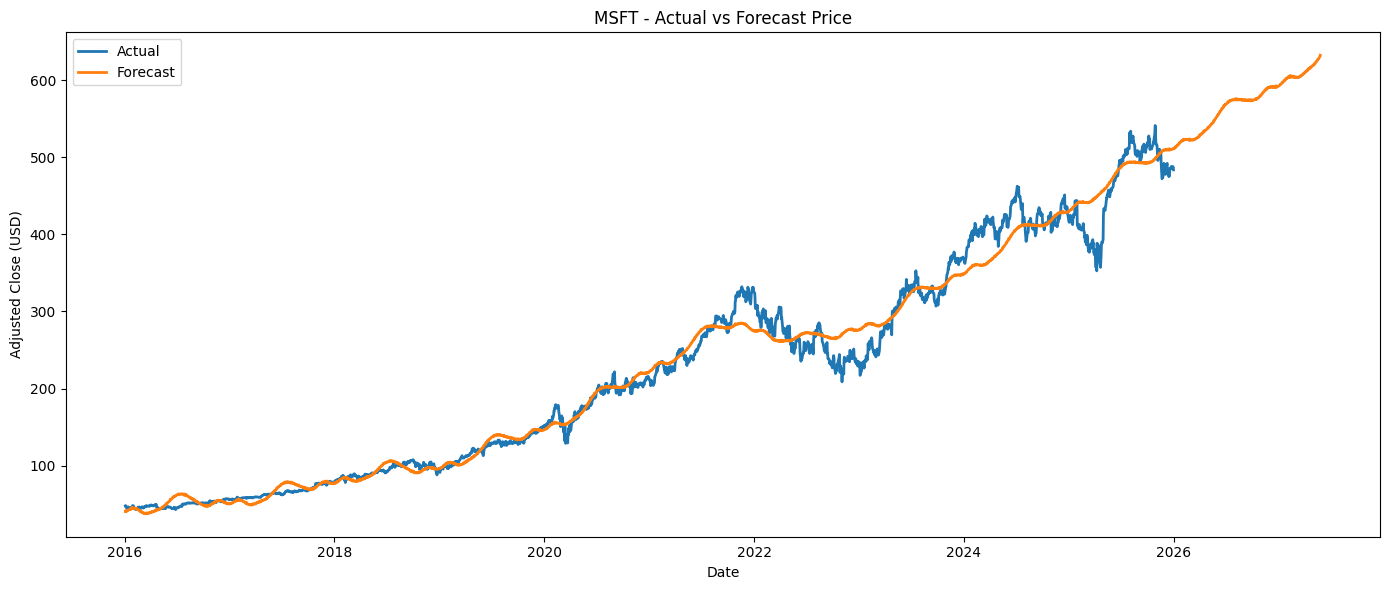

In [34]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_msft, x="ds", y="y", label="Actual", linewidth=2)
sns.lineplot(data=forecast_msft, x="ds", y="yhat1", label="Forecast", linewidth=2)

if {"yhat1_lower", "yhat1_upper"}.issubset(forecast_msft.columns):
    plt.fill_between(
        forecast_msft["ds"],
        forecast_msft["yhat1_lower"],
        forecast_msft["yhat1_upper"],
        alpha=0.25,
        label="Confidence Interval"
    )

plt.title("MSFT - Actual vs Forecast Price")
plt.xlabel("Date")
plt.ylabel("Adjusted Close (USD)")
plt.legend()
plt.tight_layout()
plt.show()

##### Plotting the Trend Component

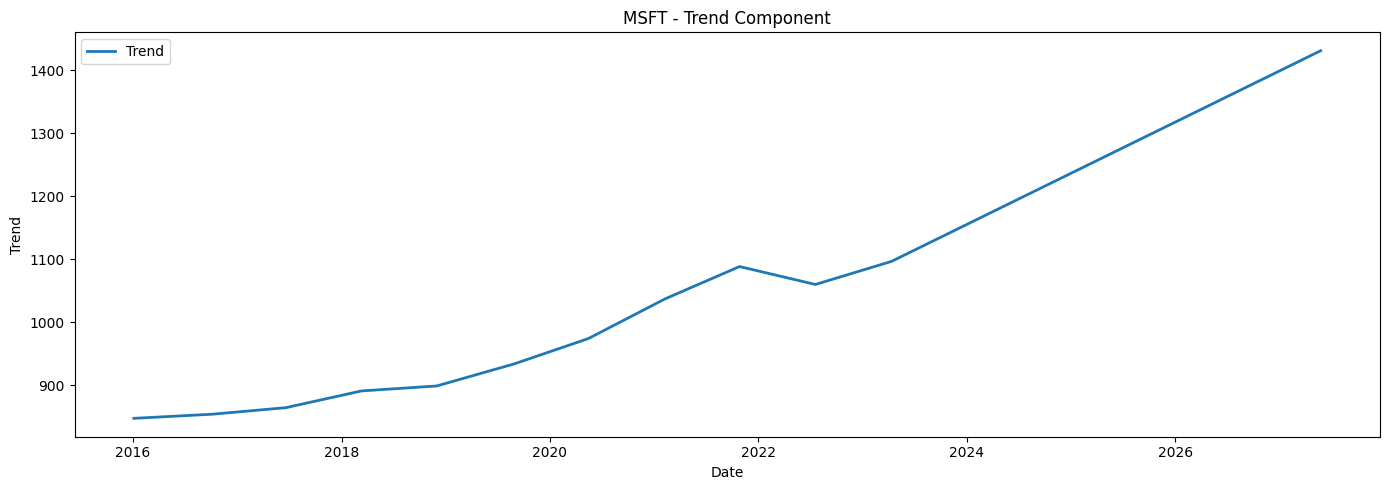

In [35]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=forecast_msft, x="ds", y="trend", linewidth=2, label="Trend")
plt.title("MSFT - Trend Component")
plt.xlabel("Date")
plt.ylabel("Trend")
plt.legend()
plt.tight_layout()
plt.show()

##### Plotting Yearly Seasonality

MSFT yearly component columns: ['season_yearly']


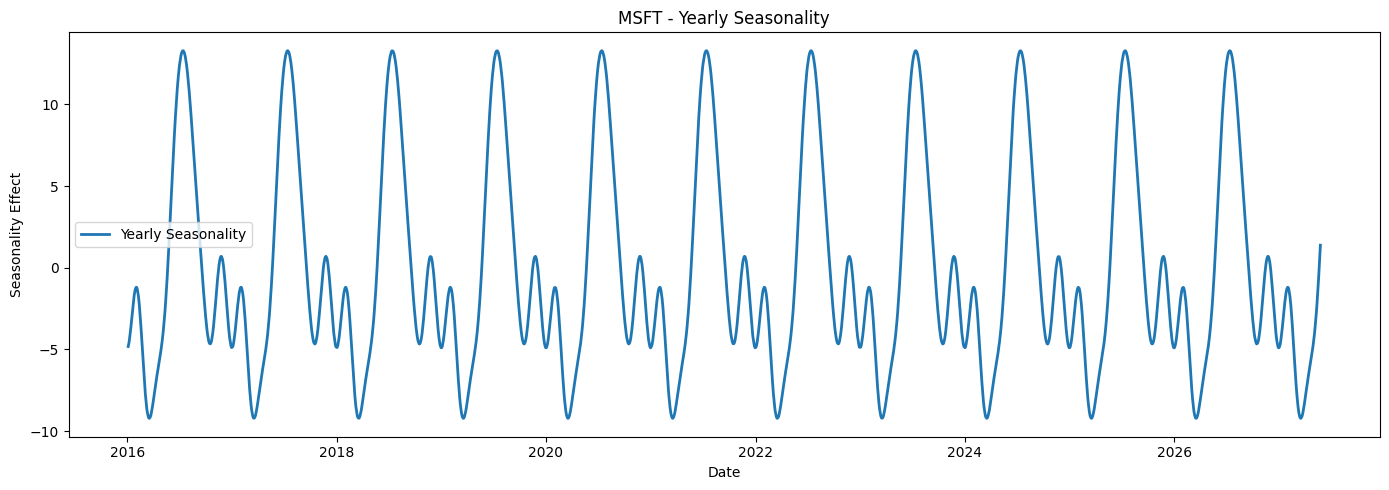

In [36]:
yearly_cols_msft = [c for c in forecast_msft.columns if "yearly" in c]
print("MSFT yearly component columns:", yearly_cols_msft)

if yearly_cols_msft:
    plt.figure(figsize=(14, 5))
    sns.lineplot(data=forecast_msft, x="ds", y=yearly_cols_msft[0], linewidth=2, label="Yearly Seasonality")
    plt.title("MSFT - Yearly Seasonality")
    plt.xlabel("Date")
    plt.ylabel("Seasonality Effect")
    plt.tight_layout()
    plt.show()

##### Plotting Monthly Component

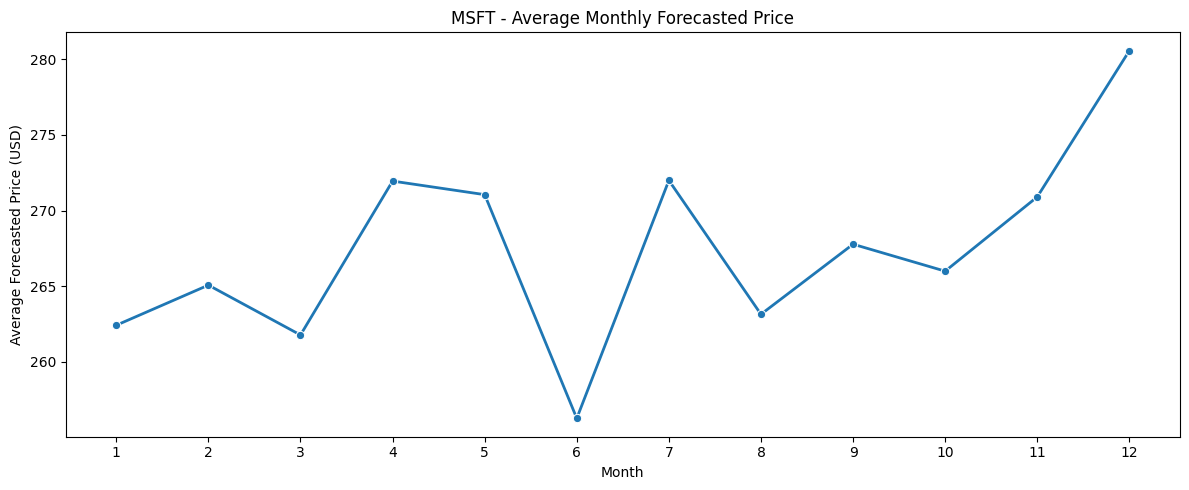

In [37]:
forecast_msft["month"] = forecast_msft["ds"].dt.month
monthly_msft = forecast_msft.groupby("month", as_index=False)["yhat1"].mean()

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_msft, x="month", y="yhat1", marker="o", linewidth=2)
plt.title("MSFT - Average Monthly Forecasted Price")
plt.xlabel("Month")
plt.ylabel("Average Forecasted Price (USD)")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

##### Plotting Weekly Component

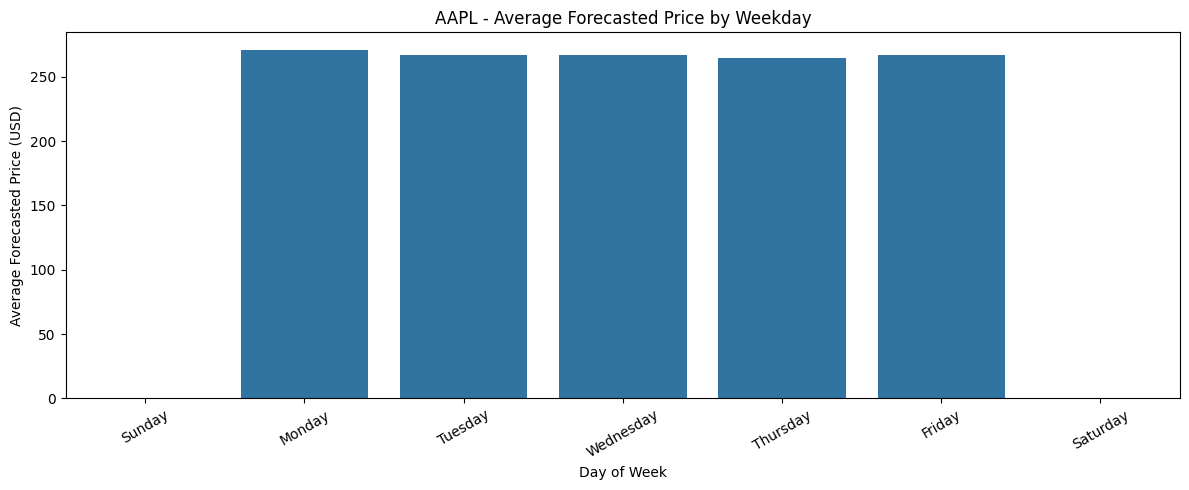

In [38]:
forecast_msft["weekday"] = forecast_msft["ds"].dt.day_name()
weekly_msft = (
    forecast_msft.groupby("weekday")["yhat1"].mean()
    .reindex(weekly_order)
    .reset_index()
)

plt.figure(figsize=(12, 5))
sns.barplot(data=weekly_msft, x="weekday", y="yhat1")
plt.title("AAPL - Average Forecasted Price by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Average Forecasted Price (USD)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()